# Custom SMA Crossover Strategy

## 1. Intuition
- What is the strategy trying to do?
- Why did you choose this stock and SMA windows?

## 2. Math & Assumptions
- Return formulas (simple + log)
- Sharpe formula
- Drawdown explanation

## 3. Code Walkthrough
- With inline comments
- Use functions if you can (e.g., signal generation, metric calc)

## 4. Visualization
- Strategy vs Buy & Hold chart
- Signal markers optional

## 5. Metrics & Interpretation
- Sharpe Ratio
- Max Drawdown
- Final cumulative return

## 6. Reflection
- What worked? What didn’t?
- Would you trade this?
- How could this be improved?

## 7. Next Steps
- What’s one variation you’d like to try?


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = yf.download("TSLA", start="2020-01-01", end="2025-01-01", auto_adjust=False)
# Flatten the MultiIndex columns
df.columns = df.columns.get_level_values(0)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,32.809334,33.232666,31.215334,31.580000,467164500


In [5]:
df["Simple return"] = df["Adj Close"].pct_change()
df["Log return"] = (df["Adj Close"]/df["Adj Close"].shift(1)).apply(np.log)

<Axes: title={'center': 'Simple vs Log return (TSLA)'}, xlabel='Date'>

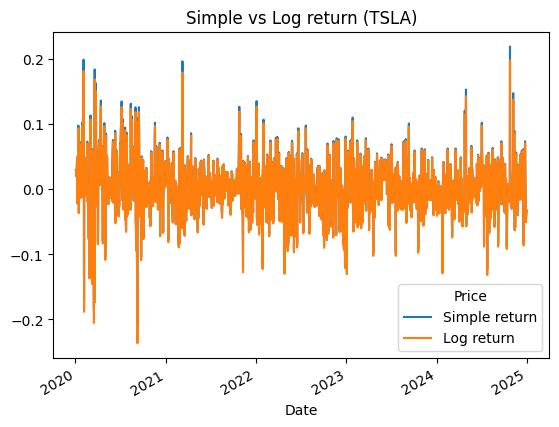

In [6]:
df[["Simple return", "Log return"]].plot(title="Simple vs Log return (TSLA)")

<Axes: title={'center': 'TSLA with moving average'}, xlabel='Date'>

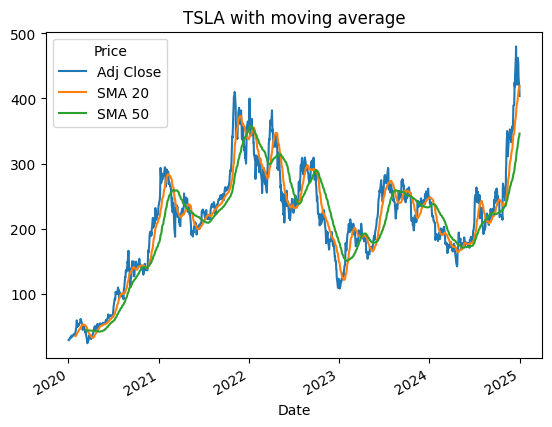

In [8]:
df["SMA 20"] = df["Adj Close"].rolling(20).mean()
df["SMA 50"] = df["Adj Close"].rolling(50).mean()

df[["Adj Close", "SMA 20", "SMA 50"]].plot(title="TSLA with moving average")

<Axes: title={'center': 'TSLA Volatility Graph 20 day rolling'}, xlabel='Date'>

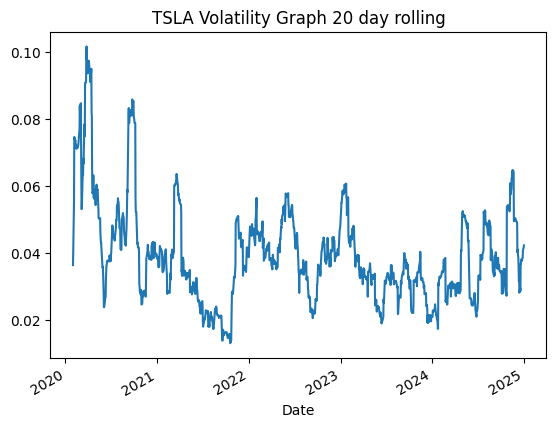

In [10]:
df["Volatility 20"] = df["Log Return"].rolling(20).std()
df["Volatility 20"].plot(title="TSLA Volatility Graph 20 day rolling")

<Axes: title={'center': 'Cumulative Return of AAPL'}, xlabel='Date'>

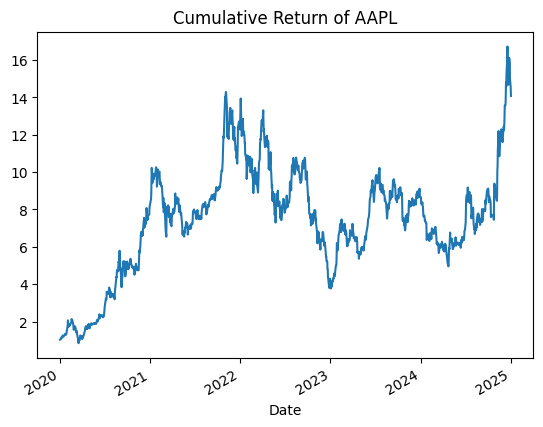

In [12]:
df["Cumulative Return"] = (1 + df["Simple return"]).cumprod()
df["Cumulative Return"].plot(title="Cumulative Return of AAPL")

C:\Users\prams\AppData\Local\Temp\ipykernel_28524\331448063.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Signal"][df["SMA 20"] > df["SMA 50"]] = 1
C:\Users\prams\AppData\Local\Temp\ipykernel_28524\331448063.py:2: SettingWithCopyWa

<Axes: title={'center': 'Buy & Hold vs Strategy'}, xlabel='Date'>

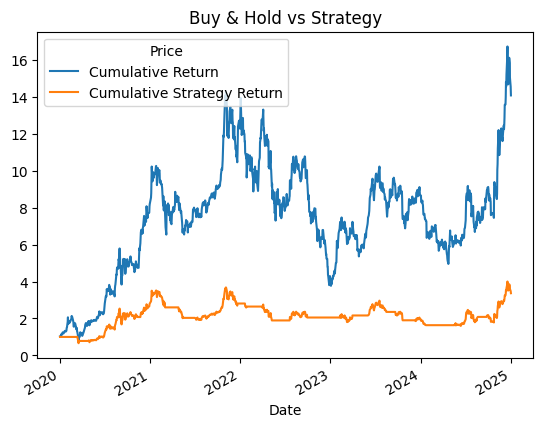

In [14]:
df["Signal"] = 0
df["Signal"][df["SMA 20"] > df["SMA 50"]] = 1
df["Position"] = df["Signal"].shift(1)

df["Strategy Return"] = df["Position"] * df["Simple return"]
df["Cumulative Strategy Return"] = (1 + df["Strategy Return"]).cumprod()
df[["Cumulative Return", "Cumulative Strategy Return"]].plot(title="Buy & Hold vs Strategy")

In [15]:
# Sharpe Ratio
sharpe = df["Strategy Return"].mean() / df["Strategy Return"].std() * np.sqrt(252)
print("Sharpe Ratio:", sharpe)

# Max Drawdown
cum_returns = df["Cumulative Strategy Return"]
drawdown = cum_returns / cum_returns.cummax() - 1
max_drawdown = drawdown.min()
print("Max Drawdown:", max_drawdown)


Sharpe Ratio: 0.7471287480206236
Max Drawdown: -0.5660833717017075
